## IBM Machine Learning Course Lab 4 - K Nearest Neighbors

This is my own attempt at Lab 5 of 'Machine Learning with Python' by IBM on Coursera. It includes my own insight when solving problems. The method of analysis presented here is far more rigorous than that required by the course.

In [1]:
""" importing necessary packages """
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


In [3]:
""" Importing the data set """

!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
    
df = pd.read_csv("teleCust1000t.csv")
df.head(10)

--2020-07-25 14:22:02--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K   175KB/s    in 0.2s    

2020-07-25 14:22:03 (175 KB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


## Data Exploration

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64


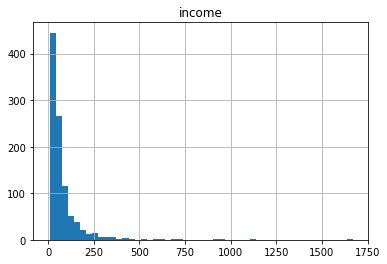

In [12]:
print(df['custcat'].value_counts()) #shows the number of data points for each category

#cust cat is a category that shows the service that the customer has. What would affect this?
#What factors could be affecting the category? Income for sure, is there a way to visualize this?

df.hist(column='income', bins=50) #shows the income distrubution. As per this, it seems that income will 
#not necessarily affect the custcat, but we can visualize this better?

## Data Preparation

In [20]:
predictors = ['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside'] 
#the above should be based on the data exploration
X = df[predictors].values
#now we have our data in array format, which can be used by sklearn !
y = df['custcat'].values #our y categorical values


#normalize data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float)) 
#we convert all the values that we have (which might be strings to flaot), and we fit them 
#to a normalized 'scale'
#this step is highly important as it will prevent large numbers from skewing our distance measurements



#splitting our dataset
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts( X, y, test_size=0.2, random_state=4)



## Classificastion

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
Train set Accuracy:  0.5125
Test set Accuracy:  0.335


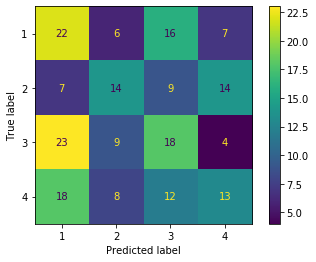

In [42]:
from sklearn.neighbors import KNeighborsClassifier as KNC

k = 4 #set number of neighbors
neigh = KNC(n_neighbors = k).fit(X_train,y_train) #create the neighbors object
print(neigh)

y_hat = neigh.predict(X_test)


"""
#For visualisation
unique_class = np.unique(y)
colors = ['blue','red','yellow','green']
pred_to_check = ['age','income','employ']


for predictor in pred_to_check:
    
    for color, categ in zip(colors,unique_class):
        plt.plot(df[[predictor]].loc[])
        plt.xlabel(predictor)
        plt.ylabel()
        
    plt.show()
    """

from sklearn import metrics

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))

print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

#clearly our Jaccard score is very low... we need to improve the model
#might have to do with the number of k? 
#a few different K's tried, but minimal changes to the test set accuracy. It seems that some of the parameterd
#that we're using for the classification may be adding unnecessary data? Is there a way to remove these?

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(neigh, X_test, y_test)


## Data Exploration x2

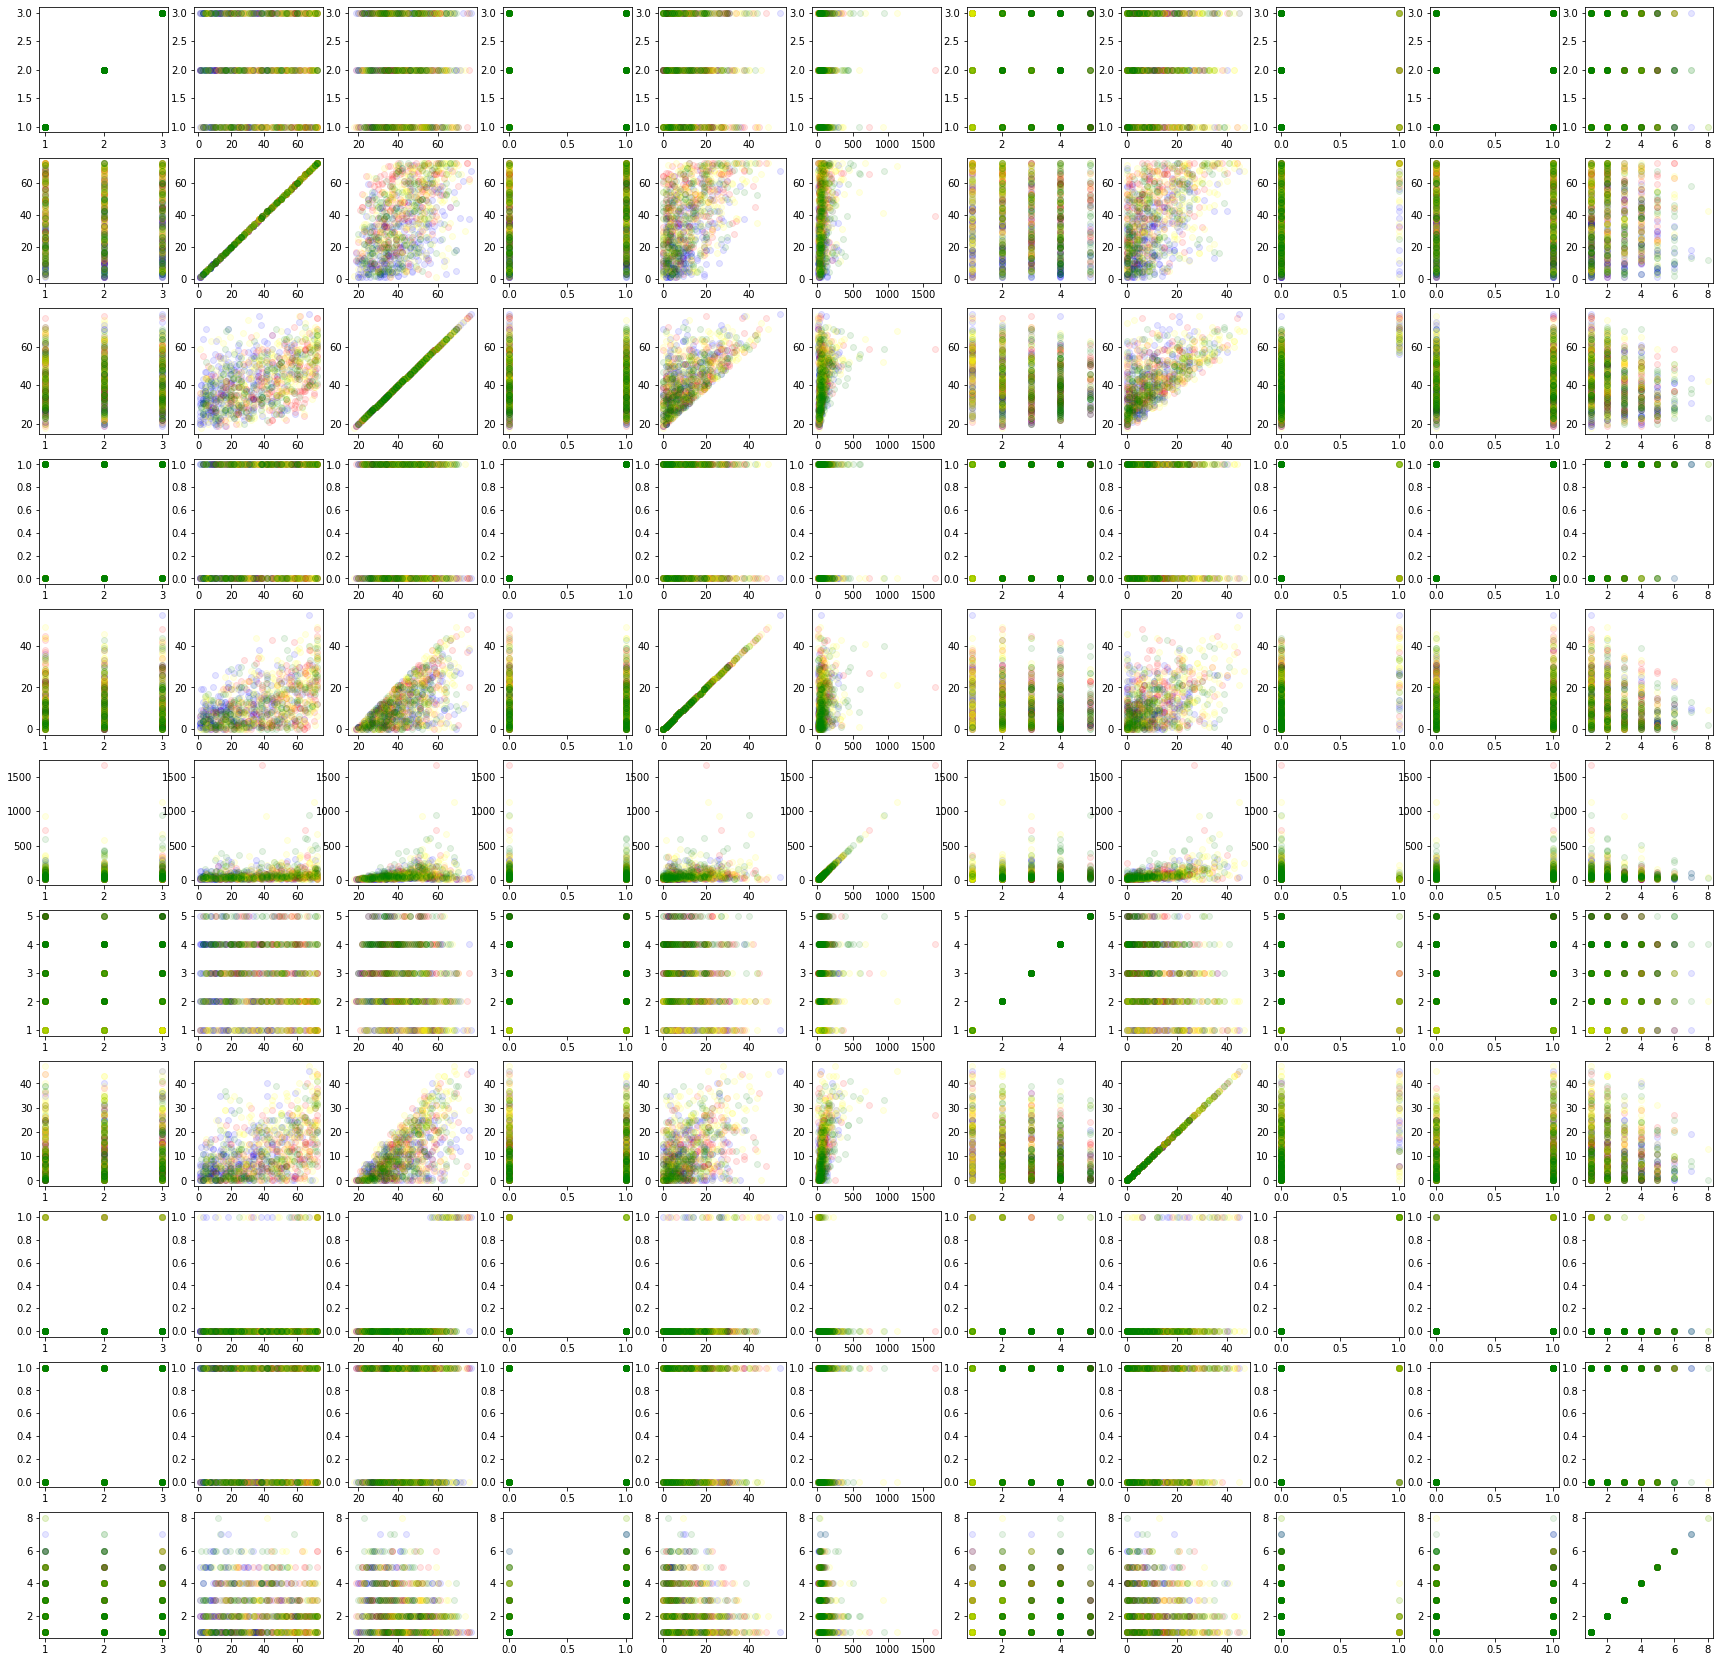

In [63]:
figure, axes = plt.subplots(nrows=len(predictors), ncols=len(predictors), figsize=(30,30))
unique_class = np.unique(y)
colors = ['blue','red','yellow','green']
for i,row in enumerate(predictors):
    for j,column in enumerate(predictors):
        for color, categ in zip(colors,unique_class):
            axes[i,j].plot(df[column].loc[df['custcat']==categ],df[row].loc[df['custcat']==categ],'o',color=color, alpha = 0.1)


#cannot see much, as the dots seem to cover each other...

#not sure how to deal with this data, this is more convoluted that I expected... 
#need to think about it more


## Finding best k to use


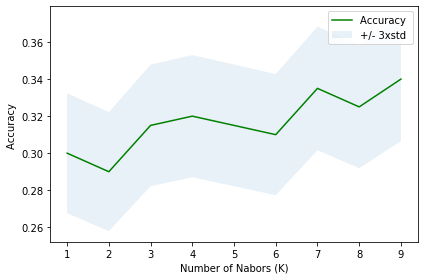

In [66]:
#this entire section is copied from the IBM course, with none of my input

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNC(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()


#below is my input:
#as shown by the graph, my prediction was correct that different k's do not really affect the accurac of the 
#model... there is something off which I need to figure out. What are the real factors that affect 
#cust cat? What are we missing?

#from the matrix scatter plots, really the only somewhat credible argument we can make is that tenure, age, address
#are the parameters that we should try for the model...
#as such I will recreate the analysis with only these parameters as our predictors

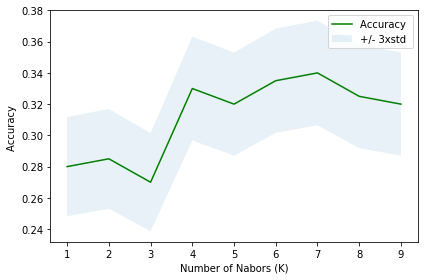

In [72]:
predictors = ['age','tenure','address']

X = df[predictors].values
y = df['custcat'].values

k = 10

mean_acc =  np.zeros((k-1))
std_acc = np.zeros((k-1))

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float)) 
X_train, X_test, y_train, y_test = tts( X, y, test_size=0.2, random_state=42)


for k_val in range(1,k):
    neigh = KNC(n_neighbors = k_val).fit(X_train,y_train)
    y_hat=neigh.predict(X_test)
    mean_acc[k_val-1] = metrics.accuracy_score(y_test, y_hat)
    std_acc[k_val-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])


plt.plot(range(1,k),mean_acc,'g')
plt.fill_between(range(1,k),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

#accuracy is perhaps even worse than before... 
#not sure how to improve this. Perhaps the dataset is just not good enough?
    

## Conclusion


Not the best form of analysis, though I have learnt how to use k-nearest neighbor a bit...
Interested to try this out on other datasets (perhaps the iTunes ones might work?)